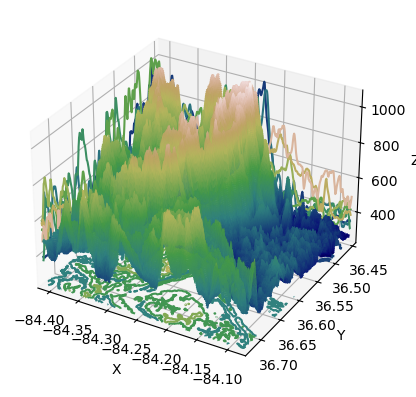

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib.colors import LinearSegmentedColormap, LightSource
from matplotlib import cm

#colors = ['black', 'brown', 'blue', 'green', 'lightgreen']
#cmap = LinearSegmentedColormap.from_list("mycmap", colors)
cmap = cm.gist_earth

import numpy as np
from matplotlib import cbook
dem = cbook.get_sample_data('jacksboro_fault_dem.npz')
Z = dem['elevation']
nrows, ncols = Z.shape
x = np.linspace(dem['xmin'], dem['xmax'], ncols)
y = np.linspace(dem['ymin'], dem['ymax'], nrows)
X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.plot_surface(X, Y, Z, cmap=cmap, alpha=1.0, lw=0, rstride=1, cstride=1, antialiased=True)
ax.contour(X, Y, Z, cmap=cmap, levels=100)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph
xlim = [x[0],x[-1]]; ylim = [y[0], y[-1]]; zlim=[np.min(Z), np.max(Z)]
ax.contour(X, Y, Z, zdir='z', offset=zlim[0], cmap=cmap)
ax.contour(X, Y, Z, zdir='x', offset=xlim[0], cmap=cmap)
ax.contour(X, Y, Z, zdir='y', offset=ylim[1], cmap=cmap)

ax.set(xlim=xlim, ylim=ylim, zlim=zlim, xlabel='X', ylabel='Y', zlabel='Z')

plt.show()